In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall

In [2]:
import os
import cv2
import pickle
import numpy as np
from ultralytics import YOLO
from collections import defaultdict

# --- CONFIGURATION ---
# IMPORTANT: Change this to the correct path where you uploaded your dataset on Kaggle
NORMAL_VIDEOS_PATH = '/kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition'

# Load the YOLO model
model = YOLO('yolov8n.pt')

# --- DATA EXTRACTION ---
all_trajectories = []
video_files = [os.path.join(NORMAL_VIDEOS_PATH, f) for f in os.listdir(NORMAL_VIDEOS_PATH)]

# Loop through each video file
for video_path in video_files:
    print(f"Processing video: {video_path}")
    cap = cv2.VideoCapture(video_path)
    trajectory_builder = defaultdict(list)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Run tracking
        results = model.track(frame, persist=True, classes=0, verbose=False)
        
        if results[0].boxes.id is not None:
            # Get boxes and track IDs
            boxes = results[0].boxes.xywh.cpu()
            track_ids = results[0].boxes.id.int().cpu().tolist()
            
            # Store the center point of each tracked person
            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                center_point = (int(x), int(y))
                trajectory_builder[track_id].append(center_point)

    # After processing a video, save the completed trajectories
    for track_id, path in trajectory_builder.items():
        if len(path) > 10: # Only save reasonably long paths
            all_trajectories.append(np.array(path))
    
    cap.release()

# Save all collected trajectories to a file
with open('trajectories.pkl', 'wb') as f:
    pickle.dump(all_trajectories, f)

print(f"\nPreprocessing complete. Saved {len(all_trajectories)} trajectories to trajectories.pkl")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_781_x264.mp4
requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_696_x264.mp4
Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_606_x264.mp4
Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_365_x264.mp4
Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_478_x264.mp4
WARNING ⚠️ not enough matching points
Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition/Normal_Videos_603_x264.mp4
Processing video: /kaggle/input/normal-behaviour/Normal_Videos_for_Event_

In [5]:
import os

# Make sure this path is EXACTLY the same as the one in your preprocessing script
path = '/kaggle/input/normal-behaviour/Normal_Videos_for_Event_Recognition'

try:
    files = os.listdir(path)
    if len(files) > 0:
        print(f"✅ Success! Found {len(files)} files in the directory.")
        print("Here are the first 5 files:", files[:5])
    else:
        print("⚠️ Warning: The path is correct, but the folder is empty.")
except FileNotFoundError:
    print("❌ ERROR: The path is incorrect. Please check the folder name in your Kaggle input directory.")

✅ Success! Found 50 files in the directory.
Here are the first 5 files: ['Normal_Videos_781_x264.mp4', 'Normal_Videos_696_x264.mp4', 'Normal_Videos_606_x264.mp4', 'Normal_Videos_365_x264.mp4', 'Normal_Videos_478_x264.mp4']


In [1]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- CONFIGURATION ---
MAX_SEQ_LENGTH = 50  # The length all trajectories will be padded/truncated to
EMBEDDING_DIM = 64   # The size of the compressed representation

# --- DATA LOADING & PREPARATION ---
# Load the preprocessed trajectories
with open('/kaggle/input/trajectories/trajectories.pkl', 'rb') as f:
    trajectories = pickle.load(f)

# Normalize the data (important for neural networks)
normalized_trajectories = [traj / np.max(traj, axis=0) for traj in trajectories]

# Pad sequences to ensure they all have the same length
padded_trajectories = pad_sequences(
    normalized_trajectories, 
    maxlen=MAX_SEQ_LENGTH, 
    dtype='float32', 
    padding='post', 
    truncating='post'
)

# --- BUILD THE AUTOENCODER MODEL ---
inputs = Input(shape=(MAX_SEQ_LENGTH, 2))
# Encoder
encoded = LSTM(EMBEDDING_DIM, activation='relu')(inputs)
# Decoder
decoded = RepeatVector(MAX_SEQ_LENGTH)(encoded)
decoded = LSTM(2, activation='sigmoid', return_sequences=True)(decoded)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# --- TRAIN THE MODEL ---
print("\nStarting model training...")
autoencoder.fit(
    padded_trajectories, 
    padded_trajectories, 
    epochs=50, 
    batch_size=32,
    shuffle=True
)

# --- SAVE THE TRAINED MODEL ---
autoencoder.save('anomaly_detector.h5')
print("\nTraining complete. Model saved as anomaly_detector.h5")

2025-08-24 13:16:33.155448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756041393.418208      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756041393.497494      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-24 13:16:49.047999: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 2)          │           536 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,688 (69.09 KB)

 Trainable params: 17,688 (69.09 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2053
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1058
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0954
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0927
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0932
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0884
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0912
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0876
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0866
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0913
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0910
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0918
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0867
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0888
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


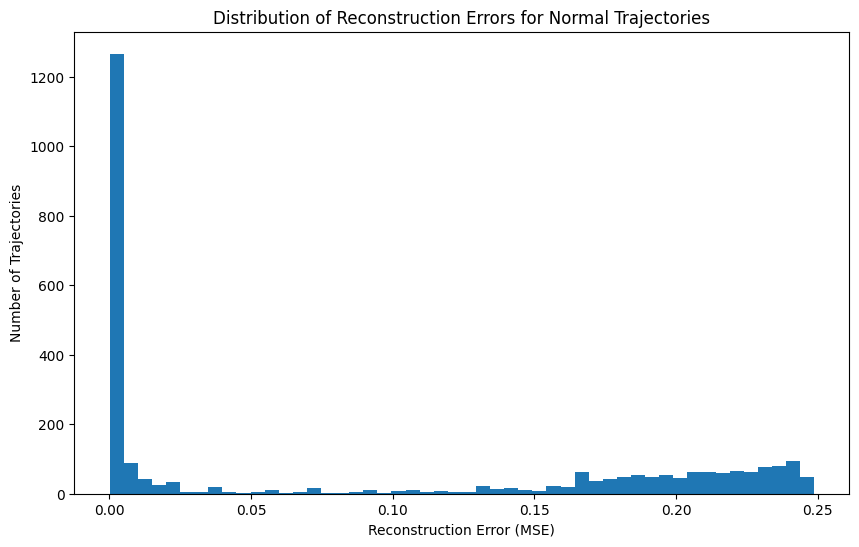


Calculated Anomaly Threshold (99th percentile): 0.24522456988692284

Evaluation complete. Anomaly threshold saved to threshold.txt


In [5]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
MAX_SEQ_LENGTH = 50  # Must be the same as in your training script

# --- LOAD DATA AND MODEL ---
# Load the preprocessed trajectories
with open('/kaggle/input/trajectories/trajectories.pkl', 'rb') as f:
    trajectories = pickle.load(f)

# Load the trained autoencoder model, but tell it not to compile
autoencoder = tf.keras.models.load_model('anomaly_detector.h5', compile=False)

# Manually re-compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# --- DATA PREPARATION ---
# Normalize and pad the trajectories just like we did for training
normalized_trajectories = [traj / np.max(traj, axis=0) for traj in trajectories]
padded_trajectories = pad_sequences(
    normalized_trajectories, 
    maxlen=MAX_SEQ_LENGTH, 
    dtype='float32', 
    padding='post', 
    truncating='post'
)

# --- CALCULATE RECONSTRUCTION ERROR ---
# Get the model's reconstructions of the normal data
reconstructed_trajectories = autoencoder.predict(padded_trajectories)

# Calculate the Mean Squared Error (MSE) between the original and reconstructed data
# This error value is our measure of "abnormality"
mse = np.mean(np.power(padded_trajectories - reconstructed_trajectories, 2), axis=(1, 2))

# --- VISUALIZE THE ERRORS ---
# Plot a histogram of the reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Number of Trajectories")
plt.title("Distribution of Reconstruction Errors for Normal Trajectories")
plt.show()

# --- DETERMINE AND SAVE THE THRESHOLD ---
# A good threshold is typically a value slightly higher than the highest error
# seen in the normal data. We can use the 99th percentile as a robust choice.
threshold = np.percentile(mse, 99)
print(f"\nCalculated Anomaly Threshold (99th percentile): {threshold}")

# Save the threshold to a file so we can use it in our main application
with open('threshold.txt', 'w') as f:
    f.write(str(threshold))

print("\nEvaluation complete. Anomaly threshold saved to threshold.txt")